## Классификация. Логистическая регрессия и SVM

### Необходимые импорты

In [1]:
import numpy as np
import pandas as pd 
import scipy.stats 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression

### Получим данные

In [2]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Проверим данные на полные дубликаты

In [5]:
duplicated_rows = data[data.duplicated(keep='first')]
print(data.duplicated().sum())
print("Дублирующиеся строки:")
print(duplicated_rows)

52
Дублирующиеся строки:
       age         workclass  fnlwgt     education  educational-num  \
864     24           Private  194630     Bachelors               13   
11189   37           Private   52870     Bachelors               13   
11212   29           Private   36440     Bachelors               13   
13848   30           Private  180317     Assoc-voc               11   
15960   18      Self-emp-inc  378036          12th                8   
18476   39           Private  184659       HS-grad                9   
19399   19           Private  130431       5th-6th                3   
19726   41           Private  116391     Bachelors               13   
20606   25           Private  308144     Bachelors               13   
21162   25           Private  308144     Bachelors               13   
21385   90           Private   52386  Some-college               10   
24361   21           Private  243368     Preschool                1   
25189   29                 ?   41281     Bachelors  

### Удалим дубликаты

In [7]:
clean_data = data.drop_duplicates(ignore_index=True)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48790 entries, 0 to 48789
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  object
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   48790 non-null  object
 14  income           48790 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### Предобработка данных.


In [8]:
selectedColumns = clean_data[['age', 'gender', 'education', 'hours-per-week', 'income']]

In [9]:
selectedColumns['gender'].value_counts()

gender
Male      32614
Female    16176
Name: count, dtype: int64

In [10]:
selectedColumns['income'].value_counts()

income
<=50K    37109
>50K     11681
Name: count, dtype: int64

In [11]:
selectedColumns.sample(5)

,age,gender,education,hours-per-week,income
27708,34,Male,Some-college,62,<=50K
17645,20,Male,10th,40,<=50K
32303,58,Female,HS-grad,32,<=50K
28449,40,Male,Some-college,60,>50K
31045,17,Male,11th,15,<=50K


### Преобразуем категориальные переменные в числа

In [12]:
X = pd.get_dummies(selectedColumns, columns=['gender', 'education'], drop_first=True)

del X['income']

X.head()

,age,hours-per-week,gender_Male,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,25,40,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,38,50,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,28,40,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,44,40,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,18,30,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


### Закодируем целевую переменную

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data['income'])
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [19]:
# записываем в целевую переменную y преобразованный столбец income

y = pd.Series(data=le.transform(clean_data['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

### Обучение.

In [21]:
# Разделим данные на тестовую и обучающую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# обучаем на части датасета (train)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [23]:
predictions[:5] # посмотрим как выглядят наши предсказания

array([0, 1, 0, 1, 0])

In [24]:
predict_arr = model.predict(X_test) # получаем массив

In [25]:
predict_arr

array([0, 1, 0, ..., 0, 1, 0], shape=(14637,))

In [38]:
proba = model.predict_proba(X_test)
proba

array([[0.62371679, 0.37628321],
       [0.4571778 , 0.5428222 ],
       [0.60418637, 0.39581363],
       ...,
       [0.62570147, 0.37429853],
       [0.4684784 , 0.5315216 ],
       [0.85456009, 0.14543991]], shape=(14637, 2))

In [27]:
model.score(X_train, y_train) 

0.8027698884431822

In [28]:
model.score(X_test,y_test)

0.7973628475780556

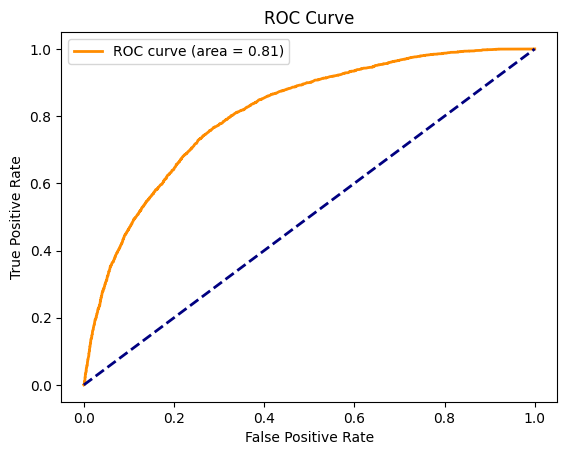

In [39]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Для бинарной классификации
fpr, tpr, thresholds = roc_curve(y_test, proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Метод опорных векторов. SVM.

In [29]:
from sklearn.svm import SVC

# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC()) 
clf.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'


Получим скор для обучающей и тестовой выборок.

In [30]:
clf.score(X_train, y_train) 

0.8090650894504143

In [31]:
clf.score(X_test, y_test)

0.8020769283323085

<p>Без StandardScaler получаем более худший результат:</p>

In [33]:
svc = SVC()
svc.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [34]:
svc.score(X_train, y_train)

0.7617193218750915

In [35]:
svc.score(X_test, y_test)

0.7579422012707522